In [57]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('./data/차량_연비_데이터(20022022).csv')

# 데이터 확인
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [58]:
# 데이터 정보 확인
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             22556 non-null  int64  
 1   MAKE             22556 non-null  str    
 2   MODEL            22556 non-null  str    
 3   VEHICLE CLASS    22556 non-null  str    
 4   ENGINE SIZE      22556 non-null  float64
 5   CYLINDERS        22556 non-null  int64  
 6   TRANSMISSION     22556 non-null  str    
 7   FUEL             22556 non-null  str    
 8   CITY (L/100 km)  22556 non-null  float64
 9   HWY (L/100 km)   22556 non-null  float64
 10  COMB (L/100 km)  22556 non-null  float64
 11  COMB (mpg)       22556 non-null  int64  
 12  EMISSIONS        22556 non-null  int64  
dtypes: float64(4), int64(4), str(5)
memory usage: 2.2 MB


In [59]:
# 결측치 확인
df.isna().sum()

YEAR               0
MAKE               0
MODEL              0
VEHICLE CLASS      0
ENGINE SIZE        0
CYLINDERS          0
TRANSMISSION       0
FUEL               0
CITY (L/100 km)    0
HWY (L/100 km)     0
COMB (L/100 km)    0
COMB (mpg)         0
EMISSIONS          0
dtype: int64

In [60]:
# 수치형 컬럼 기술통계 확인
df.describe()

,YEAR,ENGINE SIZE,CYLINDERS,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


# 전처리 전략
1. km단위 조정 : 한국인이 이해하기 쉽게 조정
2. mpg열 및 새로 추가된 컬럼 제거 : mpg는 mile per gallan으로 미국 단위라 (L/100 km를 조정해서 사용)
3. 차량 분류 대소문자 통일, 특수문자 정제
4. 차량 분류 그룹핑 : wagon을 sedan으로 분류함 -> 비슷한 연비량과 배출량이라 괜찮음
    SPECIAL PURPOSE VEHICLE 모델명 구글링해보니, van과 비슷하게 생겼음 그냥 밴임
5. 컬럼 별 변수 확인 및 IQR 값으로 이상치 처리 (필요한 컬럼만)
6. 
7. 
8. fuel값 이름 조정 : 가독성 상향 # 발표 시에만 표시


In [61]:
# 1. 단위 변환하여 새 컬럼 생성: L/100km → km/L
df['COMB (km/L)'] = 100 / df['COMB (L/100 km)']
df['CITY (km/L)'] = 100 / df['CITY (L/100 km)']
df['HWY (km/L)']  = 100 / df['HWY (L/100 km)']
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,COMB (km/L),CITY (km/L),HWY (km/L)
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,12.345679,10.869565,14.925373
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,13.157895,11.764706,15.384615
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,10.000000,8.196721,13.513514
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,8.695652,7.462687,10.869565
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,11.627907,10.000000,14.285714


In [62]:
# 2. COMB(mpg) 등 필요없는 컬럼들 삭제하기
df = df.drop(columns=[
    'COMB (L/100 km)', 'CITY (L/100 km)', 'HWY (L/100 km)', 'COMB (mpg)'
])
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,EMISSIONS,COMB (km/L),CITY (km/L),HWY (km/L)
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,186,12.345679,10.869565,14.925373
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,175,13.157895,11.764706,15.384615
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,230,10.000000,8.196721,13.513514
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,264,8.695652,7.462687,10.869565
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,198,11.627907,10.000000,14.285714


In [63]:
# 3. 클래스명 대문자로 통일하기
df["VEHICLE CLASS"] = df["VEHICLE CLASS"].str.strip().str.upper()
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.replace(':', ' -', regex=False)
df["VEHICLE CLASS"].unique()

<StringArray>
[                 'COMPACT',                 'MID-SIZE',
               'SUBCOMPACT', 'STATION WAGON - MID-SIZE',
              'MINICOMPACT',               'TWO-SEATER',
    'STATION WAGON - SMALL',                'FULL-SIZE',
                      'SUV',              'VAN - CARGO',
          'VAN - PASSENGER',  'PICKUP TRUCK - STANDARD',
     'PICKUP TRUCK - SMALL',                  'MINIVAN',
           'SUV - STANDARD',  'SPECIAL PURPOSE VEHICLE',
              'SUV - SMALL']
Length: 17, dtype: str

In [64]:
# 4. 차량 분류 그룹핑
mapping = {
    # SEDAN
    'COMPACT': 'SEDAN',
    'MID-SIZE': 'SEDAN',
    'SUBCOMPACT': 'SEDAN',
    'STATION WAGON - MID-SIZE': 'SEDAN',
    'MINICOMPACT': 'SEDAN',
    'TWO-SEATER': 'SEDAN',
    'STATION WAGON - SMALL': 'SEDAN',
    'FULL-SIZE': 'SEDAN',
    # SUV
    'SUV': 'SUV',
    'SUV - STANDARD': 'SUV',
    'SUV - SMALL': 'SUV',
    # TRUCK
    'PICKUP TRUCK - STANDARD': 'TRUCK',
    'PICKUP TRUCK - SMALL': 'TRUCK',
    # VAN
    'VAN - CARGO': 'VAN',
    'VAN - PASSENGER': 'VAN',
    'MINIVAN': 'VAN',
    'SPECIAL PURPOSE VEHICLE': 'VAN'
}
group_df = df.copy()
group_df['VEHICLE CLASS'] = df['VEHICLE CLASS'].replace(mapping).copy()
group_df["VEHICLE CLASS"].unique()

<StringArray>
['SEDAN', 'SUV', 'VAN', 'TRUCK']
Length: 4, dtype: str

In [65]:
group_df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,EMISSIONS,COMB (km/L),CITY (km/L),HWY (km/L)
0,2000,ACURA,1.6EL,SEDAN,1.6,4,A4,X,186,12.345679,10.869565,14.925373
1,2000,ACURA,1.6EL,SEDAN,1.6,4,M5,X,175,13.157895,11.764706,15.384615
2,2000,ACURA,3.2TL,SEDAN,3.2,6,AS5,Z,230,10.000000,8.196721,13.513514
3,2000,ACURA,3.5RL,SEDAN,3.5,6,A4,Z,264,8.695652,7.462687,10.869565
4,2000,ACURA,INTEGRA,SEDAN,1.8,4,A4,X,198,11.627907,10.000000,14.285714


In [ ]:
# 5. IQR 기법을 활용한 이상 치 제거
# # 한글 폰트 설정 (Windows)
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트
matplotlib.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지


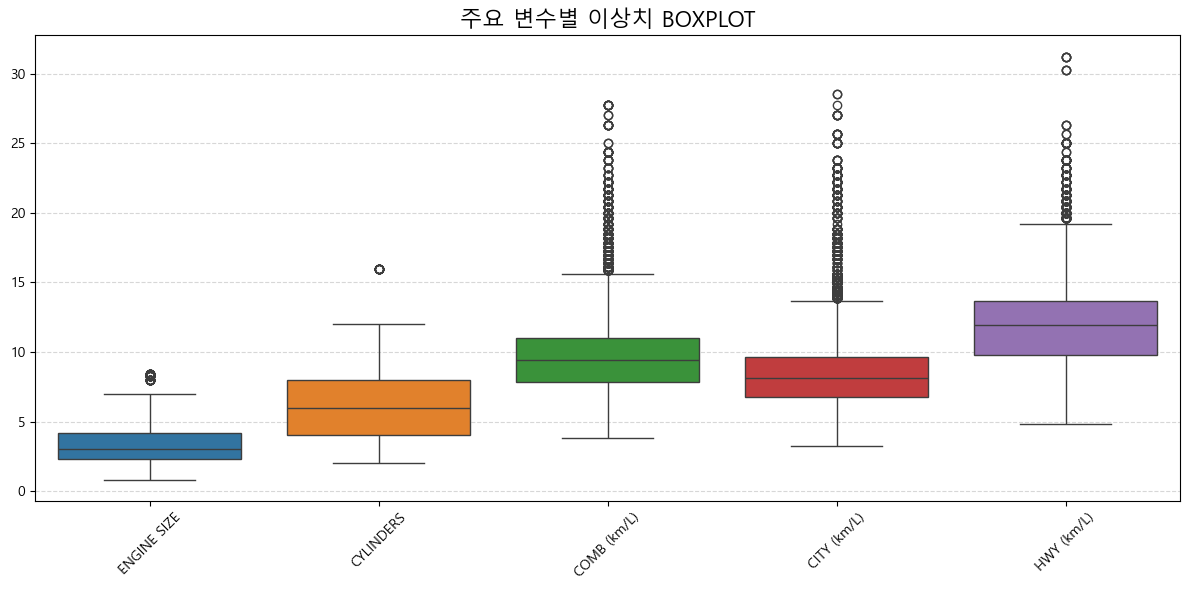

In [ ]:
# IQR 기법을 사용해 이상치 제거할 변수를 선정
# 시각화로 이상치가 있는 변수 확인
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['ENGINE SIZE', 'CYLINDERS', 'COMB (km/L)', 'CITY (km/L)', 'HWY (km/L)' #,'EMISSIONS'
        ]

plt.figure(figsize=(12, 6))
sns.boxplot(data=group_df[cols])
plt.xticks(rotation=45)
plt.title("주요 변수별 이상치 BOXPLOT", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [68]:
# 이상치 제거 함수 정의
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

columns_to_clean = [
    'ENGINE SIZE', 'CYLINDERS', 'COMB (km/L)', 'CITY (km/L)', 'HWY (km/L)' ,'EMISSIONS'
]

iqr_df = remove_outliers_iqr(group_df, columns_to_clean)


# iqr로 이상치를 제거한 df는 iqr_df
# iqr을 적용하지 않은 전처리 df는 group_df


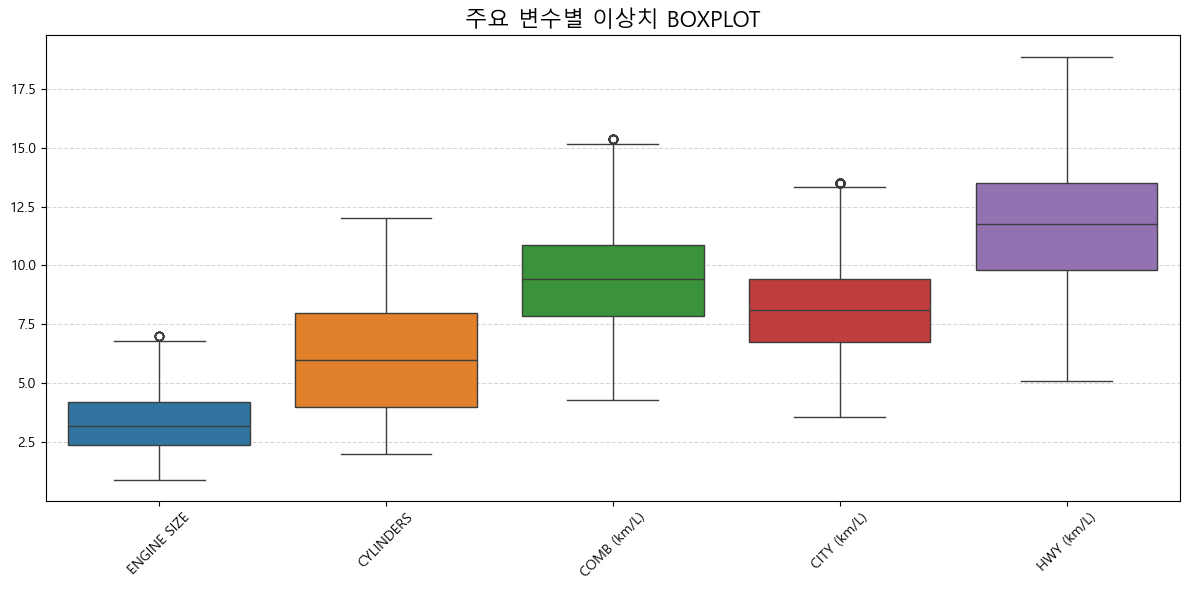

In [69]:
# 이상치 제거 후 시각화
import matplotlib.pyplot as plt
import seaborn as sns

cols2 = ['ENGINE SIZE', 'CYLINDERS', 'COMB (km/L)', 'CITY (km/L)', 'HWY (km/L)' #,'EMISSIONS'
        ]

plt.figure(figsize=(12, 6))
sns.boxplot(data=iqr_df[cols2])
plt.xticks(rotation=45)
plt.title("주요 변수별 이상치 BOXPLOT", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [70]:
group_df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,EMISSIONS,COMB (km/L),CITY (km/L),HWY (km/L)
0,2000,ACURA,1.6EL,SEDAN,1.6,4,A4,X,186,12.345679,10.869565,14.925373
1,2000,ACURA,1.6EL,SEDAN,1.6,4,M5,X,175,13.157895,11.764706,15.384615
2,2000,ACURA,3.2TL,SEDAN,3.2,6,AS5,Z,230,10.000000,8.196721,13.513514
3,2000,ACURA,3.5RL,SEDAN,3.5,6,A4,Z,264,8.695652,7.462687,10.869565
4,2000,ACURA,INTEGRA,SEDAN,1.8,4,A4,X,198,11.627907,10.000000,14.285714


In [71]:
iqr_df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,EMISSIONS,COMB (km/L),CITY (km/L),HWY (km/L)
0,2000,ACURA,1.6EL,SEDAN,1.6,4,A4,X,186,12.345679,10.869565,14.925373
1,2000,ACURA,1.6EL,SEDAN,1.6,4,M5,X,175,13.157895,11.764706,15.384615
2,2000,ACURA,3.2TL,SEDAN,3.2,6,AS5,Z,230,10.000000,8.196721,13.513514
3,2000,ACURA,3.5RL,SEDAN,3.5,6,A4,Z,264,8.695652,7.462687,10.869565
4,2000,ACURA,INTEGRA,SEDAN,1.8,4,A4,X,198,11.627907,10.000000,14.285714
